In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
v = 1        # Vacuum expectation value
lmbda = 1    # Coupling constant

def higgs_field(v,lmbda):
    # Grid
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    
    # Mexican hat potential
    R_squared = X**2 + Y**2
    V = lmbda * (R_squared - v**2)**2

    return X,Y,V

def plot_mexican_hat(X,Y,V):
    # Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, V, cmap='plasma', edgecolor='none', alpha=0.9)
    
    # Labels
    ax.set_title("Mexican Hat Potential (Higgs Field)", fontsize=14)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$V(x, y)$")
    
    # Adjust view angle
    ax.view_init(elev=35, azim=45)
    plt.tight_layout()
    plt.show()

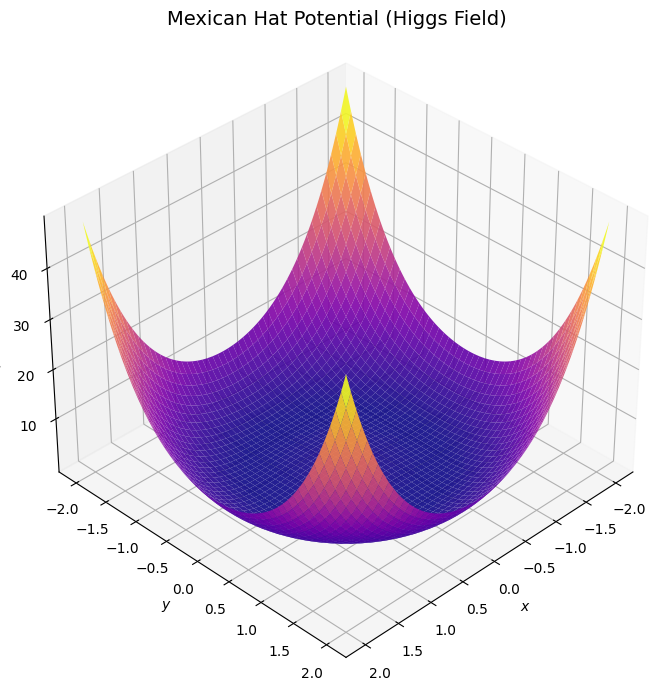

In [2]:
X,Y,V = higgs_field(v,lmbda)

plot_mexican_hat(X,Y,V)

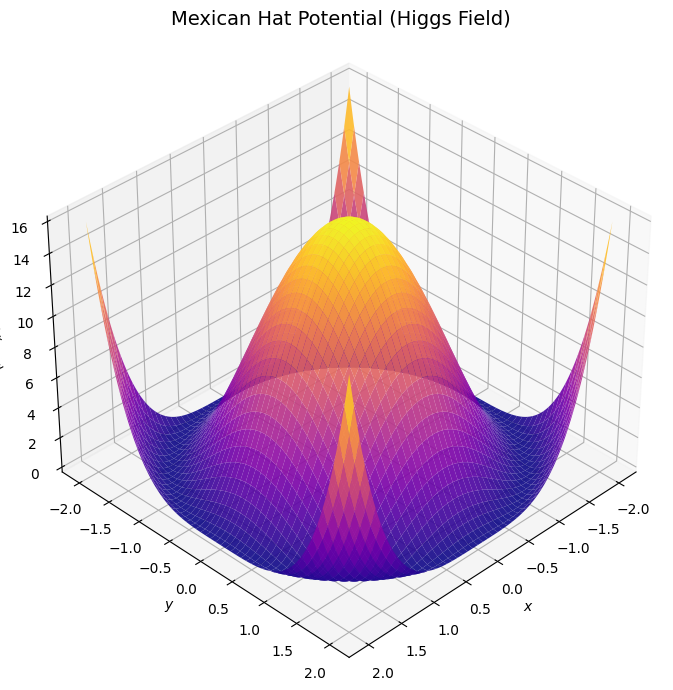

In [3]:
X,Y,V = higgs_field(-2*v,lmbda)

plot_mexican_hat(X,Y,V)

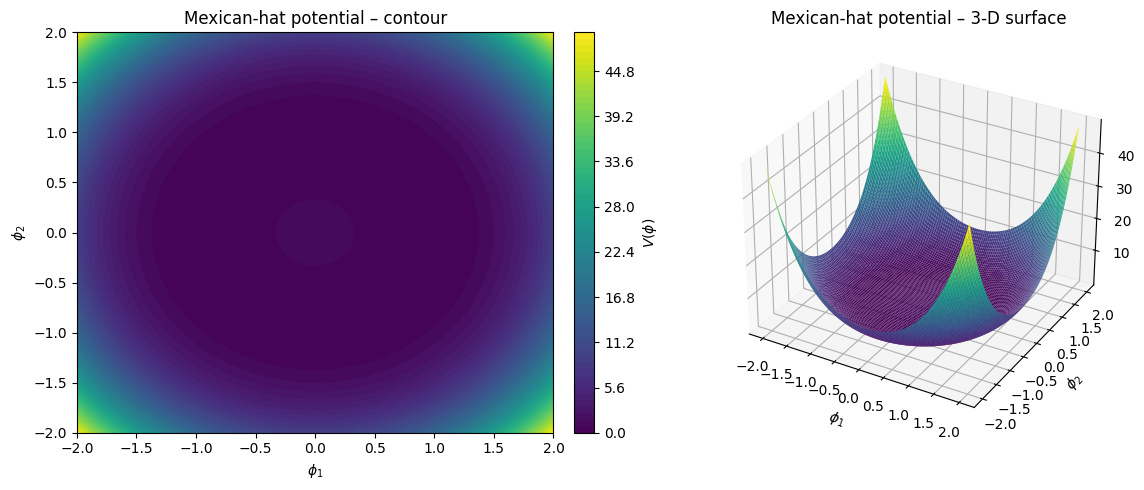

In [4]:
#!/usr/bin/env python3
"""
Mexican‑hat (Higgs) potential in 2 D

V(φ) = λ (|φ|² – v²)²
where φ = (φ₁, φ₂) is a complex‑scalar field written as a 2‑component real vector.
λ > 0 controls the steepness, v > 0 sets the radius of the degenerate minima.

The script:
  • builds a regular grid (φ₁, φ₂)
  • evaluates V on that grid
  • shows a contour plot (level curves)
  • shows a 3‑D surface plot
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # noqa: F401  (needed for 3‑D projection)

# ----------------------------------------------------------------------
# 1️⃣ Parameters – feel free to tweak them
# ----------------------------------------------------------------------
lam = 1.0   # λ  (strength of the quartic term)
v   = 1.0   # vacuum expectation value (radius of the “hat brim”)

# ----------------------------------------------------------------------
# 2️⃣ Build a 2‑D grid in field space
# ----------------------------------------------------------------------
n_pts = 400                     # resolution of the plot
phi_range = 2.0 * v             # cover a square that comfortably contains the brim
phi1 = np.linspace(-phi_range, phi_range, n_pts)
phi2 = np.linspace(-phi_range, phi_range, n_pts)
Phi1, Phi2 = np.meshgrid(phi1, phi2)

# ----------------------------------------------------------------------
# 3️⃣ Evaluate the potential V(φ₁, φ₂) = λ (Φ₁²+Φ₂² – v²)²
# ----------------------------------------------------------------------
R2 = Phi1**2 + Phi2**2           # |φ|²
V  = lam * (R2 - v**2)**2

# ----------------------------------------------------------------------
# 4️⃣ Plotting
# ----------------------------------------------------------------------
plt.figure(figsize=(12, 5))

# ----- 4a) Contour plot (top‑down view) -----
ax1 = plt.subplot(1, 2, 1)
cont = ax1.contourf(Phi1, Phi2, V, levels=80, cmap='viridis')
ax1.set_xlabel(r'$\phi_1$')
ax1.set_ylabel(r'$\phi_2$')
ax1.set_title('Mexican‑hat potential – contour')
cbar = plt.colorbar(cont, ax=ax1, fraction=0.046, pad=0.04)
cbar.set_label(r'$V(\phi)$')

# ----- 4b) 3‑D surface plot -----
ax2 = plt.subplot(1, 2, 2, projection='3d')
surf = ax2.plot_surface(Phi1, Phi2, V,
                        rstride=4, cstride=4,
                        cmap='viridis', edgecolor='none',
                        antialiased=True)
ax2.set_xlabel(r'$\phi_1$')
ax2.set_ylabel(r'$\phi_2$')
ax2.set_zlabel(r'$V(\phi)$')
ax2.set_title('Mexican‑hat potential – 3‑D surface')
ax2.view_init(elev=30, azim=-60)   # nice viewing angle
plt.tight_layout()
plt.show()